1. 로또 1회부터 현재 회차까지 로또 복권 1등 당첨 번호를 수집하고, EXCEL로 저장하는 코드를 작성하세요.
2. 실시간으로 데이터를 저장하고 코드를 실행했을 때, 수집이 안된 회차부터 수집하세요. (예를들어 1회부터 10회까지 데이터가 수집된 상태라면 코드를 다시 실행했을 때 11회차부터 데이터가 수집이 되어야함)
3. 데이터를 모두 수집했다면 가장 많이 나온번호와 가장 적게 나온 번호를 출력하는 코드를 작성하세요.
4. 번호순으로 최근 기준 몇 주 동안 미출현하고 있는지 시각화하세요.
5. 최근 날짜를 기준으로 가장 오랫동안 나오지 않았던 번호를 찾으세요.
6. 로또 복권 게임에서 1등은 보너스번호 없이 전부 한줄에 일반 숫자 6개가 줄줄히 맞아야 됩니다. 2등 당첨확인은 일반 숫자 5개+보너스 번호가 모두 떠야 당첨이 가능하고, 그 외 일반 숫자 5개만 맞으면 3등으로 확정이 됩니다. 4등은 4개, 5등은 3개. 그 밑은 모두 꽝이 됩니다. 지금까지 한번도 나오지 않았던 5등 조합을 찾아보세요.

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

import time
import random

In [2]:
# 로또 1회부터 현재 회차까지 로또 복권 1등 당첨 번호를 수집하고, EXCEL로 저장하는 코드를 작성하세요.
url = requests.get(f"https://search.daum.net/search?w=tot&rtmaxcoll=LOT&DA=LOT&q=1%ED%9A%8C%20%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8")
html=BeautifulSoup(url.text)

In [3]:
number = html.find("div", attrs={'class':'lottonum'}).text.split()
number.pop(6)
number

['10', '23', '29', '33', '37', '40', '16']

In [4]:
def make_number(html):
    number = html.find("div", attrs={'class':'lottonum'}).text.split()
    number.pop(6)
    number

    box = []
    for i in number:
        box.append(int(i))

    return box

In [5]:
total=[['회차','1번째','2번째','3번째','4번째','5번째','6번째','보너스']]
# lotto = pd.DataFrame(total[1:], columns=total[0])
# lotto.to_excel("생성 파일/lotto.xlsx", index=False)

In [6]:
latest_url = requests.get("https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q=%EB%A1%9C%EB%98%90")
latest_html= BeautifulSoup(latest_url.text)
latest_round = int(latest_html.find("span", attrs = {"class":'f_red'}).text[:-1])
latest_round

1108

In [7]:
total = pd.read_excel("생성 파일/lotto.xlsx")

for n in range(len(total)+1,latest_round+1):
    
    url = requests.get(f"https://search.daum.net/search?w=tot&rtmaxcoll=LOT&DA=LOT&q={n}%ED%9A%8C%20%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8")
    html=BeautifulSoup(url.text)
    
    number = make_number(html)
        
    time.sleep(1 + random.random())
    print(f"{n}회 로또 데이터 저장 완료 : {number}")
    
    total.loc[n] = [n]+number
    
    total.to_excel("생성 파일/lotto.xlsx", index=False)

1108회 로또 데이터 저장 완료 : [7, 19, 26, 37, 39, 44, 27]


In [8]:
total

,회차,1번째,2번째,3번째,4번째,5번째,6번째,보너스
0,1,10,23,29,33,37,40,16
1,2,9,13,21,25,32,42,2
2,3,11,16,19,21,27,31,30
3,4,14,27,30,31,40,42,2
4,5,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...,...
1103,1104,1,7,21,30,35,38,2
1104,1105,6,16,34,37,39,40,11
1105,1106,1,3,4,29,42,45,36
1106,1107,6,14,30,31,40,41,29


강사님과 함께

In [9]:
from tqdm import tqdm
import pickle

try :
    f = open("생성 파일/lotto.dat", 'rb')
    total = pickle.load(f)
    f.close()
except:
    total=[]
    
for n in tqdm(range(len(total)+1, latest_round+1)):
    url = requests.get(f"https://search.daum.net/search?w=tot&rtmaxcoll=LOT&DA=LOT&q={n}%ED%9A%8C%20%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8")
    html=BeautifulSoup(url.text)
    
    number = make_number(html)
    total.append(number)
    
    f = open("생성 파일/lotto.dat", "wb")
    pickle.dump(total,f)
    f.close()
    
    time.sleep(0.5 + random.random())

  1%|▍                                                                                | 6/1108 [00:10<32:26,  1.77s/it]


KeyboardInterrupt: 

In [10]:
#3. 데이터를 모두 수집했다면 가장 많이 나온번호와 가장 적게 나온 번호를 출력하는 코드를 작성하세요.
sample = pd.melt(total, id_vars=['회차'])
sample['value'].value_counts()

AttributeError: 'list' object has no attribute 'columns'

In [11]:
# 4. 번호순으로 최근 기준 몇 주 동안 미출현하고 있는지 시각화하세요.
total = pd.read_excel("생성 파일/lotto.xlsx")

week = []
for n in range(1, 46):
    cnt = 0
    for i in range(len(total)-1,-1,-1):
        if n not in list(total.iloc[i,:].values)[1:]:
            cnt+=1
        else:
            break
    week.append(cnt)
week

[2,
 4,
 2,
 2,
 24,
 1,
 0,
 13,
 27,
 5,
 3,
 5,
 6,
 1,
 10,
 3,
 8,
 16,
 0,
 6,
 4,
 6,
 12,
 10,
 22,
 0,
 0,
 7,
 1,
 1,
 1,
 26,
 11,
 3,
 4,
 2,
 0,
 4,
 0,
 1,
 1,
 2,
 8,
 0,
 2]

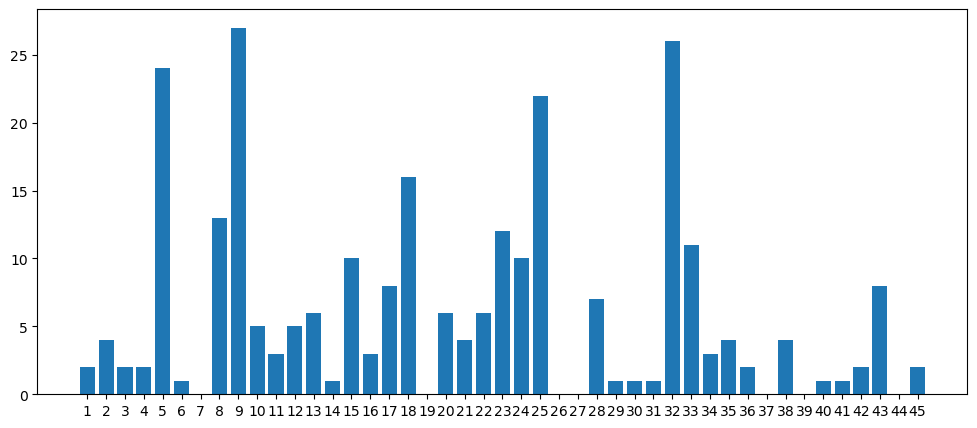

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.bar(range(1,46),week)
plt.xticks(range(1,46))
plt.show()

In [13]:
df = pd.read_excel("생성 파일/lotto.xlsx")
total = df.iloc[:,1:].to_numpy()

dic = {}
for i in total:
    for j in i:
        if j not in dic:
            dic[j]=1
        else:
            dic[j]+=1
            
rst = pd.DataFrame({'번호':dic.keys(), '빈도수':dic.values()})
rst.sort_values('빈도수')

,번호,빈도수
7,9,140
36,22,147
21,41,153
1,23,153
10,25,155
2,29,155
44,28,156
11,32,158
26,8,161
43,5,162


In [14]:
#  5. 최근 날짜를 기준으로 가장 오랫동안 나오지 않았던 번호를 찾으세요.
week.index(max(week))+1

9

In [15]:
# 6.로또 복권 게임에서 1등은 보너스번호 없이 전부 한줄에 일반 숫자 6개가 줄줄히 맞아야 됩니다. 
# 2등 당첨확인은 일반 숫자 5개+보너스 번호가 모두 떠야 당첨이 가능하고, 
# 그 외 일반 숫자 5개만 맞으면 3등으로 확정이 됩니다. 
# 4등은 4개, 5등은 3개. 그 밑은 모두 꽝이 됩니다. 
# 지금까지 한번도 나오지 않았던 5등 조합을 찾아보세요.

from itertools import combinations

fifth = set(combinations(range(1,46), 3))

for i in total.values:
    ans = set(combinations(i[1:-1],3))
    fifth = fifth - ans
    
print(len(fifth))
    

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
box=[]
for n1 in range(1, 46):
    for n2 in range(n1+1, 46):
        for n3 in range(n2+1, 46):
            cnt = 0
            for i in total:
                if n1 in i[:6] and n2 in i[:6] and n3 in i[:6]:
                    break
                else:
                    cnt += 1
                    
            if cnt == len(total):
                box.append([n1,n2,n3])

In [ ]:
len(box)